In [9]:
import pandas as pd
import numpy as np
import tensorflow as tf

df = pd.read_csv('cardA80.csv')

In [10]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [11]:
print("the total number of frauds is ", sum(df['Class']))

the total number of frauds is  365


In [12]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [13]:
df['Time_Day'] = df['Time'] / 3600 / 24
df['Time_Sin'] = np.sin(2 * np.pi * df['Time'] / 86400)
df['Time_Cos'] = np.cos(2 * np.pi * df['Time'] / 86400)
df['Amount_Day'] = df.groupby('Time_Day')['Amount'].transform('mean')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V25,V26,V27,V28,Amount,Class,Time_Day,Time_Sin,Time_Cos,Amount_Day
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.000000,0.000000,1.000000,76.155
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.000000,0.000000,1.000000,76.155
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.000012,0.000073,1.000000,251.080
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.000012,0.000073,1.000000,251.080
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.000023,0.000145,1.000000,36.830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182269,125326.0,2.256328,-0.628912,-1.585425,-1.060590,-0.132372,-0.822764,-0.300815,-0.373755,-0.667456,...,0.295812,0.048238,-0.038382,-0.059435,15.00,0,1.450532,0.305834,-0.952085,280.280
182270,125326.0,-4.481533,-4.452684,-0.317392,-0.117406,7.538519,-2.381852,-1.768850,0.577482,-1.106828,...,1.672836,0.842633,-0.273297,0.090674,34.90,0,1.450532,0.305834,-0.952085,280.280
182271,125326.0,-0.647399,0.946584,0.129663,-0.439655,0.338969,-0.765196,0.750645,0.216403,-0.636064,...,-0.139761,0.457462,-0.016215,0.100479,40.00,0,1.450532,0.305834,-0.952085,280.280
182272,125327.0,-0.695268,-0.565063,-0.038402,-4.107473,1.951146,3.574527,-0.532808,0.981679,-2.352186,...,0.820013,-0.083065,0.271367,0.101154,25.00,0,1.450544,0.305765,-0.952107,25.000


In [15]:
from sklearn.preprocessing import StandardScaler,RobustScaler
df['Amount_Day'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df['Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df['Time_Day'] = RobustScaler().fit_transform(df['Time_Day'].values.reshape(-1, 1))
#df['Time'] = StandardScaler().fit_transform(df['Time'].values.reshape(-1, 1))
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V25,V26,V27,V28,Amount,Class,Time_Day,Time_Sin,Time_Cos,Amount_Day
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.128539,-0.189115,0.133558,-0.021053,0.246851,0,-1.606352,0.000000,1.000000,0.246851
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.167170,0.125895,-0.008983,0.014724,-0.346670,0,-1.606352,0.000000,1.000000,-0.346670
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.327642,-0.139097,-0.055353,-0.059752,1.172054,0,-1.606326,0.000073,1.000000,1.172054
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.647376,-0.221929,0.062723,0.061458,0.141340,0,-1.606326,0.000073,1.000000,0.141340
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.206010,0.502292,0.219422,0.215153,-0.074813,0,-1.606301,0.000145,1.000000,-0.074813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182269,125326.0,2.256328,-0.628912,-1.585425,-1.060590,-0.132372,-0.822764,-0.300815,-0.373755,-0.667456,...,0.295812,0.048238,-0.038382,-0.059435,-0.296944,0,1.572615,0.305834,-0.952085,-0.296944
182270,125326.0,-4.481533,-4.452684,-0.317392,-0.117406,7.538519,-2.381852,-1.768850,0.577482,-1.106828,...,1.672836,0.842633,-0.273297,0.090674,-0.216559,0,1.572615,0.305834,-0.952085,-0.216559
182271,125326.0,-0.647399,0.946584,0.129663,-0.439655,0.338969,-0.765196,0.750645,0.216403,-0.636064,...,-0.139761,0.457462,-0.016215,0.100479,-0.195957,0,1.572615,0.305834,-0.952085,-0.195957
182272,125327.0,-0.695268,-0.565063,-0.038402,-4.107473,1.951146,3.574527,-0.532808,0.981679,-2.352186,...,0.820013,-0.083065,0.271367,0.101154,-0.256549,0,1.572641,0.305765,-0.952107,-0.256549


In [16]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V25,V26,V27,V28,Amount,Class,Time_Day,Time_Sin,Time_Cos,Amount_Day
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.128539,-0.189115,0.133558,-0.021053,0.246851,0,-1.606352,0.000000,1.0,0.246851
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.167170,0.125895,-0.008983,0.014724,-0.346670,0,-1.606352,0.000000,1.0,-0.346670
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.327642,-0.139097,-0.055353,-0.059752,1.172054,0,-1.606326,0.000073,1.0,1.172054
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.647376,-0.221929,0.062723,0.061458,0.141340,0,-1.606326,0.000073,1.0,0.141340
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.206010,0.502292,0.219422,0.215153,-0.074813,0,-1.606301,0.000145,1.0,-0.074813


In [17]:
X = df.drop(['Time','Class'], axis = 'columns')
y = df['Class']

In [18]:
# Generate and plot imbalanced classification dataset
from collections import Counter
from matplotlib import pyplot
from numpy import where
# summarize class distribution
counter = Counter(df['Class'])
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(df['Class'] == label)[0]

Counter({0: 181909, 1: 365})


In [19]:
# transform the dataset
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_r, y = oversample.fit_resample(X, df['Class'])
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]

Counter({0: 181909, 1: 181909})


In [20]:
X = np.array(X_r)
y = np.array(y)
print(X.shape)
print(y.shape)

(363818, 33)
(363818,)


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=1, test_size=0.1)

In [22]:
X_train.shape

(327436, 33)

In [23]:
y_train

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

In [24]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
# Define the autoencoder model
input_layer = Input(shape=(X_train.shape[1],))
encoder_layer1 = Dense(64, activation='tanh')(input_layer)
encoder_output = Dense(32, activation='relu')(encoder_layer1)
decoder_layer1 = Dense(64, activation='tanh')(encoder_output)
decoder_output = Dense(X_train.shape[1], activation='relu')(decoder_layer1)
autoencoder = Model(inputs=input_layer, outputs=decoder_output)

# Define the MLP model that takes the encoder's output as input
mlp_input = Input(shape=(32,))
mlp_layer1 = Dense(64, activation='tanh')(mlp_input)
mlp_layer2 = Dense(32, activation='relu')(mlp_layer1)
mlp_output = Dense(1, activation='sigmoid')(mlp_layer2)
mlp = Model(inputs=mlp_input, outputs=mlp_output)

# Combine the models into a single model
combined_input = autoencoder.input
combined_output = mlp(encoder_output)
combined_model = Model(inputs=combined_input, outputs=combined_output)


In [25]:
print(combined_model.summary())

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 33)]              0         
                                                                 
 dense (Dense)               (None, 64)                2176      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 model_1 (Functional)        (None, 1)                 4225      
                                                                 
Total params: 8,481
Trainable params: 8,481
Non-trainable params: 0
_________________________________________________________________
None


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout


model = Sequential()
model.add(Dense(units=58, input_dim=29, activation='relu'))
model.add(Dense(units=88, activation='relu'))
Dropout(0.5)
model.add(Dense(units=29, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [26]:
combined_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [27]:
history=combined_model.fit(X_train, y_train, batch_size=100, epochs=20,validation_data=(X_val, y_val))

Epoch 1/20
3275/3275 [==============================] - 7s 2ms/step - loss: 0.0178 - accuracy: 0.9942 - val_loss: 0.0039 - val_accuracy: 0.9990
Epoch 2/20
3275/3275 [==============================] - 7s 2ms/step - loss: 0.0047 - accuracy: 0.9989 - val_loss: 0.0028 - val_accuracy: 0.9994
Epoch 3/20
3275/3275 [==============================] - 10s 3ms/step - loss: 0.0035 - accuracy: 0.9992 - val_loss: 0.0023 - val_accuracy: 0.9994
Epoch 4/20
3275/3275 [==============================] - 10s 3ms/step - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.0013 - val_accuracy: 0.9998
Epoch 5/20
3275/3275 [==============================] - 8s 2ms/step - loss: 0.0022 - accuracy: 0.9995 - val_loss: 0.0018 - val_accuracy: 0.9997
Epoch 6/20
3275/3275 [==============================] - 10s 3ms/step - loss: 0.0020 - accuracy: 0.9996 - val_loss: 0.0013 - val_accuracy: 0.9998
Epoch 7/20
3275/3275 [==============================] - 7s 2ms/step - loss: 0.0017 - accuracy: 0.9996 - val_loss: 0.0014 - val_accura

In [28]:
# evaluate the model
_, train_acc = combined_model.evaluate(X_train, y_train, verbose=0)
_, test_acc = combined_model.evaluate(X_val, y_val, verbose=0)
print('Train: %.4f, Test: %.4f' % (train_acc, test_acc))

Train: 1.0000, Test: 0.9999


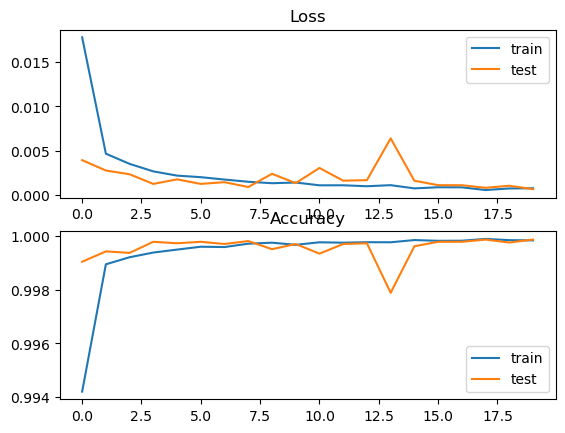

In [29]:
import matplotlib.pyplot as pyplot
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [30]:
# predict probabilities for test set
yhat_probs = combined_model.predict(X_train, verbose=0)
# reduce to 1d array
#yhat_probs = yhat_probs[:, 0]
yhat_probs = (yhat_probs > 0.5).astype(int)
yhat_probs

array([[1],
       [1],
       [0],
       ...,
       [1],
       [1],
       [0]])

In [31]:
# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_train, yhat_probs)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_train, yhat_probs)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_train, yhat_probs)
print('Recall: %f' % recall)

Accuracy: 0.999954
Precision: 0.999908
Recall: 1.000000


In [32]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true=y_train, y_pred=yhat_probs)
cm

array([[163784,     15],
       [     0, 163637]], dtype=int64)

Confusion matrix, without normalization
[[163784     15]
 [     0 163637]]


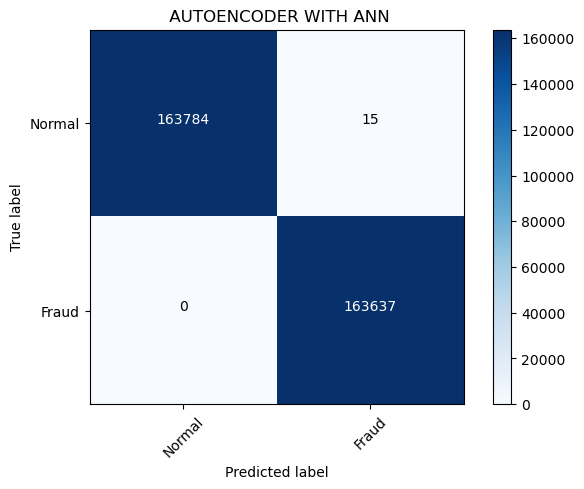

In [33]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
labels = ['Normal','Fraud']
plot_confusion_matrix(cm=cm, classes=labels, title=' AUTOENCODER WITH ANN')

In [34]:
# predict probabilities for test set
yhat_probs = combined_model.predict(X_val, verbose=0)
# reduce to 1d array
#yhat_probs = yhat_probs[:, 0]
yhat_probs = (yhat_probs > 0.5).astype(int)
yhat_probs

array([[0],
       [0],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [35]:
# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_val, yhat_probs)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_val, yhat_probs)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_val, yhat_probs)
print('Recall: %f' % recall)


Accuracy: 0.999863
Precision: 0.999726
Recall: 1.000000


Confusion matrix, without normalization
[[18105     5]
 [    0 18272]]


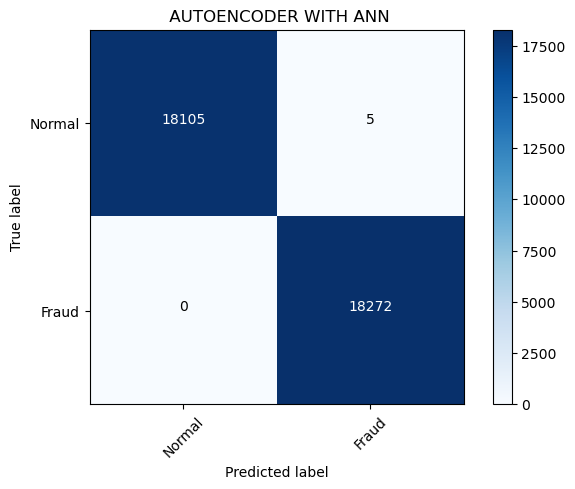

In [36]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true=y_val, y_pred=yhat_probs)
cm
plot_confusion_matrix(cm=cm, classes=labels, title=' AUTOENCODER WITH ANN')

In [37]:
# predict probabilities for test set
yhat_probs = combined_model.predict(X_test, verbose=0)

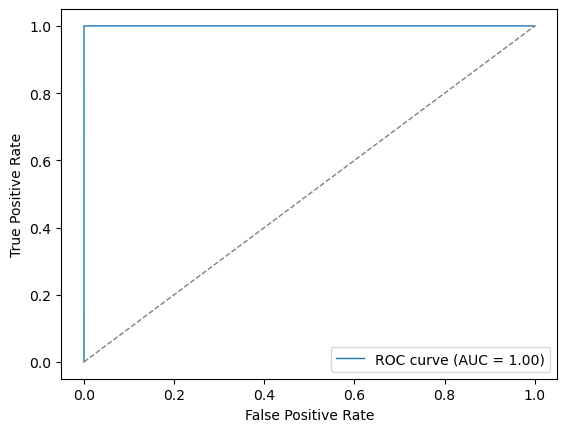

Optimal threshold: 0.9775953
[[2.1745346e-09]
 [6.5451373e-09]
 [9.9999899e-01]
 ...
 [9.9996316e-01]
 [9.9999487e-01]
 [9.9999982e-01]]


In [38]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# Compute the ROC curve and the AUC
fpr, tpr, thresholds = roc_curve(y_test, yhat_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, lw=1, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], '--', color='gray', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

# Choose a threshold based on the ROC curve
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold:", optimal_threshold)
print((yhat_probs))

In [39]:
# Choose a threshold based on the ROC curve
threshold = optimal_threshold
yhat_probs = (yhat_probs > threshold).astype(int)
yhat_probs

array([[0],
       [0],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [40]:
# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_probs)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_probs)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_probs)
print('Recall: %f' % recall)


Accuracy: 0.999945
Precision: 0.999945
Recall: 0.999945


Confusion matrix, without normalization
[[18109     1]
 [    1 18271]]


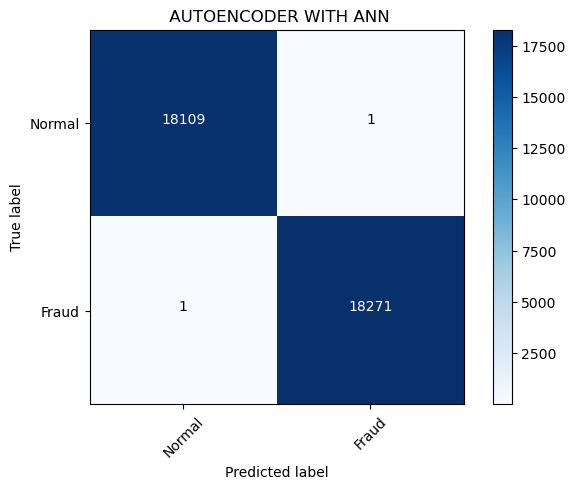

In [41]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true=y_test, y_pred=yhat_probs)
cm
plot_confusion_matrix(cm=cm, classes=labels, title=' AUTOENCODER WITH ANN')

In [42]:
# save model and architecture to single file
combined_model.save('Save_Combined_Model.h5')
print("Saved model to disk")

Saved model to disk
